# 5.4 Normal Approximation to Binomial

When $N$ is large, computing binomial probabilities exactly becomes computationally difficult. Fortunately, we can use the **normal distribution** as an approximation!

---

## Why Do We Need This?

### The Problem

Consider: What's the probability of getting between 480 and 520 heads in 1000 coin flips?

**Exact calculation**:
$$P(480 \leq X \leq 520) = \sum_{k=480}^{520} \binom{1000}{k} \left(\frac{1}{2}\right)^{1000}$$

This requires computing 41 binomial coefficients, each with huge factorials!

**Better way**: Use normal approximation.

---

## 5.4.1 When to Use the Approximation

### Rule of Thumb

The normal approximation to $\text{Binomial}(N, p)$ is good when:

$$Np \geq 5 \quad \text{AND} \quad N(1-p) \geq 5$$

**Interpretation**: Need at least 5 expected successes AND 5 expected failures.

### The Approximation

If $X \sim \text{Binomial}(N, p)$ and $N$ is large, then:

$$X \approx N(Np, \, Np(1-p))$$

More precisely:
$$\frac{X - Np}{\sqrt{Np(1-p)}} \approx N(0, 1)$$

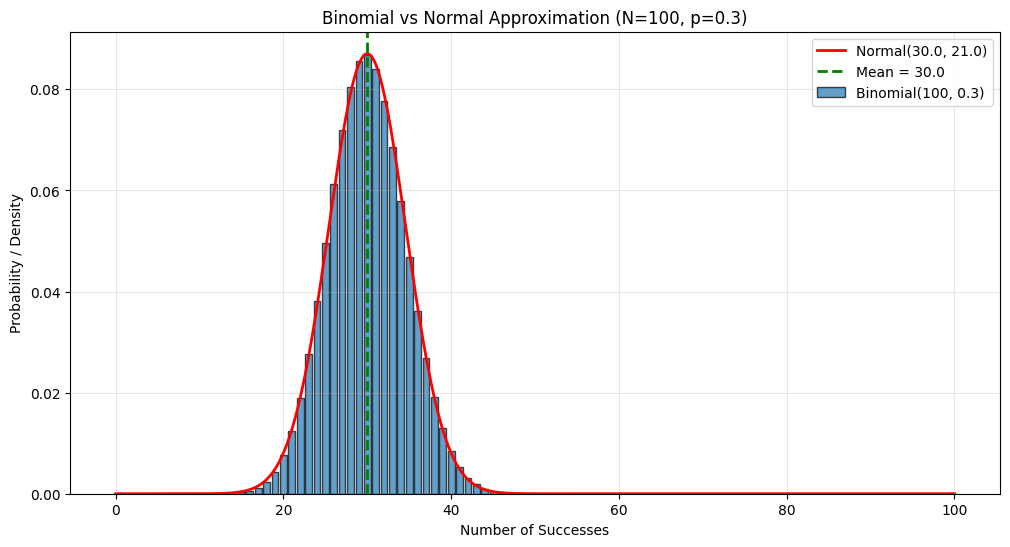

Binomial: Mean = 30.0, Variance = 21.00
Normal approx: Mean = 30.0, Variance = 21.00

Rule check: Np = 30.0 ≥ 5? True
Rule check: N(1-p) = 70.0 ≥ 5? True


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Compare binomial to normal approximation
N = 100
p = 0.3

# Binomial
k = np.arange(0, N+1)
binom_pmf = stats.binom.pmf(k, N, p)

# Normal approximation
mu = N * p
sigma = np.sqrt(N * p * (1-p))
x = np.linspace(0, N, 1000)
norm_pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.bar(k, binom_pmf, alpha=0.7, edgecolor='black', label=f'Binomial({N}, {p})')
plt.plot(x, norm_pdf, 'r-', linewidth=2, 
         label=f'Normal({mu:.1f}, {sigma**2:.1f})')
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label=f'Mean = {mu}')
plt.xlabel('Number of Successes')
plt.ylabel('Probability / Density')
plt.title(f'Binomial vs Normal Approximation (N={N}, p={p})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Binomial: Mean = {mu}, Variance = {N*p*(1-p):.2f}")
print(f"Normal approx: Mean = {mu}, Variance = {sigma**2:.2f}")
print(f"\nRule check: Np = {N*p:.1f} ≥ 5? {N*p >= 5}")
print(f"Rule check: N(1-p) = {N*(1-p):.1f} ≥ 5? {N*(1-p) >= 5}")

---

## 5.4.2 The Continuity Correction

### The Issue

Binomial is **discrete**, Normal is **continuous**. Need to be careful!

**Problem**: $P(X = k)$ for discrete vs continuous
- Binomial: $P(X = k) > 0$
- Normal: $P(X = k) = 0$ (single point has zero probability)

**Solution**: **Continuity correction** — treat discrete value $k$ as the interval $[k - 0.5, k + 0.5]$.

### How to Apply Continuity Correction

| Binomial Probability | Without Correction | **With Correction** |
|---------------------|-------------------|--------------------|
| $P(X = k)$ | $P(k < Y < k)$ = 0 | $P(k - 0.5 < Y < k + 0.5)$ |
| $P(X \leq k)$ | $P(Y \leq k)$ | $P(Y \leq k + 0.5)$ |
| $P(X < k)$ | $P(Y < k)$ | $P(Y < k - 0.5)$ |
| $P(X \geq k)$ | $P(Y \geq k)$ | $P(Y \geq k - 0.5)$ |
| $P(X > k)$ | $P(Y > k)$ | $P(Y > k + 0.5)$ |
| $P(a \leq X \leq b)$ | $P(a \leq Y \leq b)$ | $P(a - 0.5 \leq Y \leq b + 0.5)$ |

where $Y \sim N(Np, Np(1-p))$ is the normal approximation.

### Visual Explanation

P(X = 12) for Binomial(20, 0.5):
  Exact: 0.1201
  Normal (no correction): 0.0000
  Normal (with correction): 0.1194
  Error with correction: 0.0007


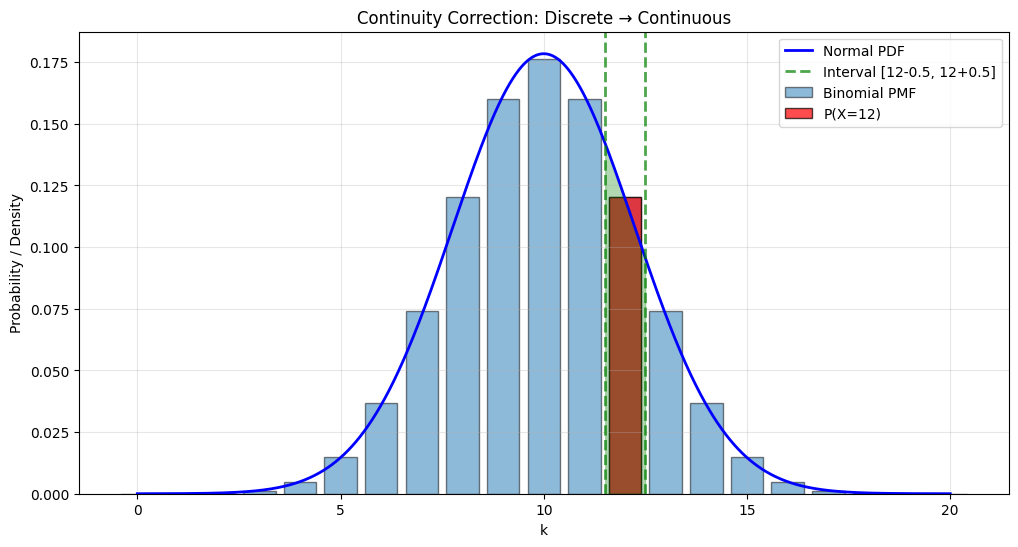

In [2]:
# Demonstrate continuity correction
N, p = 20, 0.5
k_target = 12

mu = N * p
sigma = np.sqrt(N * p * (1-p))

# Exact binomial
exact_prob = stats.binom.pmf(k_target, N, p)

# Normal without correction
no_correction = 0  # P(Y = 12) = 0 for continuous

# Normal with correction
with_correction = stats.norm.cdf(k_target + 0.5, mu, sigma) - \
                  stats.norm.cdf(k_target - 0.5, mu, sigma)

print(f"P(X = {k_target}) for Binomial({N}, {p}):")
print(f"  Exact: {exact_prob:.4f}")
print(f"  Normal (no correction): {no_correction:.4f}")
print(f"  Normal (with correction): {with_correction:.4f}")
print(f"  Error with correction: {abs(exact_prob - with_correction):.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

# Binomial bars
k = np.arange(0, N+1)
binom_pmf = stats.binom.pmf(k, N, p)
ax.bar(k, binom_pmf, alpha=0.5, edgecolor='black', label='Binomial PMF')

# Highlight k_target
ax.bar(k_target, stats.binom.pmf(k_target, N, p), color='red', alpha=0.7,
       edgecolor='black', label=f'P(X={k_target})')

# Normal approximation
x = np.linspace(0, N, 1000)
norm_pdf = stats.norm.pdf(x, mu, sigma)
ax.plot(x, norm_pdf, 'b-', linewidth=2, label='Normal PDF')

# Show continuity correction interval
ax.axvline(k_target - 0.5, color='green', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(k_target + 0.5, color='green', linestyle='--', linewidth=2, alpha=0.7,
          label=f'Interval [{k_target}-0.5, {k_target}+0.5]')
x_fill = x[(x >= k_target - 0.5) & (x <= k_target + 0.5)]
y_fill = stats.norm.pdf(x_fill, mu, sigma)
ax.fill_between(x_fill, 0, y_fill, alpha=0.3, color='green')

ax.set_xlabel('k')
ax.set_ylabel('Probability / Density')
ax.set_title('Continuity Correction: Discrete → Continuous')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

---

## 5.4.3 Worked Examples

### Example 1: Coin Flips

**Question**: Flip a fair coin 1000 times. What's the probability of getting between 480 and 520 heads?

**Solution**:

In [3]:
N = 1000
p = 0.5
a, b = 480, 520

# Parameters for normal approximation
mu = N * p
sigma = np.sqrt(N * p * (1-p))

print(f"Binomial({N}, {p})")
print(f"Normal approximation: N({mu}, {sigma**2})")
print(f"\nCheck rule: Np = {N*p}, N(1-p) = {N*(1-p)}")

# With continuity correction
prob_approx = stats.norm.cdf(b + 0.5, mu, sigma) - \
              stats.norm.cdf(a - 0.5, mu, sigma)

print(f"\nP({a} ≤ X ≤ {b}) ≈ {prob_approx:.4f}")

# Exact (for comparison, using sum)
exact = sum(stats.binom.pmf(k, N, p) for k in range(a, b+1))
print(f"Exact binomial: {exact:.4f}")
print(f"Error: {abs(exact - prob_approx):.6f}")

Binomial(1000, 0.5)
Normal approximation: N(500.0, 250.0)

Check rule: Np = 500.0, N(1-p) = 500.0

P(480 ≤ X ≤ 520) ≈ 0.8052
Exact binomial: 0.8052
Error: 0.000025


### Example 2: Quality Control

**Question**: A factory produces items with 2% defect rate. In a batch of 500, what's the probability of:
a) Exactly 10 defects?
b) At most 15 defects?
c) More than 5 defects?

**Solution**:

In [4]:
N = 500
p = 0.02

# Check rule
print(f"Check: Np = {N*p}, N(1-p) = {N*(1-p)}")
print("Both ≥ 5? ", N*p >= 5 and N*(1-p) >= 5)

mu = N * p
sigma = np.sqrt(N * p * (1-p))

print(f"\nNormal approximation: N({mu}, {sigma**2:.2f})")

# a) Exactly 10 defects
k = 10
prob_exact_approx = stats.norm.cdf(k + 0.5, mu, sigma) - \
                    stats.norm.cdf(k - 0.5, mu, sigma)
prob_exact_true = stats.binom.pmf(k, N, p)

print(f"\na) P(X = {k}):")
print(f"   Approximation: {prob_exact_approx:.4f}")
print(f"   Exact: {prob_exact_true:.4f}")

# b) At most 15 defects  
k = 15
prob_atmost_approx = stats.norm.cdf(k + 0.5, mu, sigma)
prob_atmost_true = stats.binom.cdf(k, N, p)

print(f"\nb) P(X ≤ {k}):")
print(f"   Approximation: {prob_atmost_approx:.4f}")
print(f"   Exact: {prob_atmost_true:.4f}")

# c) More than 5 defects
k = 5
prob_more_approx = 1 - stats.norm.cdf(k + 0.5, mu, sigma)
prob_more_true = 1 - stats.binom.cdf(k, N, p)

print(f"\nc) P(X > {k}):")
print(f"   Approximation: {prob_more_approx:.4f}")
print(f"   Exact: {prob_more_true:.4f}")

Check: Np = 10.0, N(1-p) = 490.0
Both ≥ 5?  True

Normal approximation: N(10.0, 9.80)

a) P(X = 10):
   Approximation: 0.1269
   Exact: 0.1264

b) P(X ≤ 15):
   Approximation: 0.9605
   Exact: 0.9530

c) P(X > 5):
   Approximation: 0.9247
   Exact: 0.9348


### Example 3: When Approximation Fails

**Question**: Does the approximation work for $N=10, p=0.1$?

Check: Np = 1.0, N(1-p) = 9.0
Both ≥ 5?  False

→ NO! Approximation will be poor.

P(X = 2):
  Exact: 0.1937
  Approximation: 0.2422
  Relative error: 25.0%


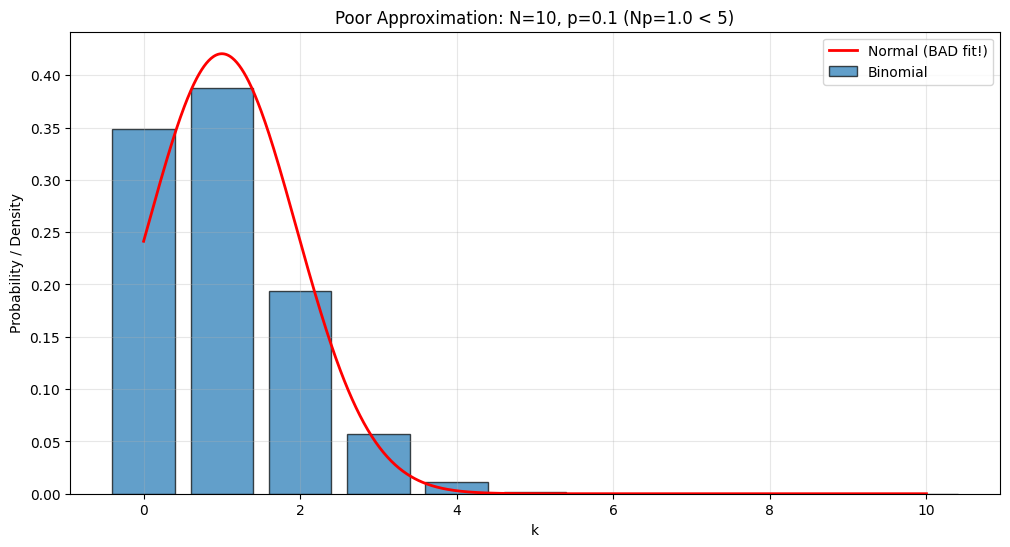

In [5]:
N = 10
p = 0.1

print(f"Check: Np = {N*p}, N(1-p) = {N*(1-p)}")
print("Both ≥ 5? ", N*p >= 5 and N*(1-p) >= 5)
print("\n→ NO! Approximation will be poor.\n")

mu = N * p
sigma = np.sqrt(N * p * (1-p))

# Compare for k=2
k = 2
exact = stats.binom.pmf(k, N, p)
approx = stats.norm.cdf(k + 0.5, mu, sigma) - stats.norm.cdf(k - 0.5, mu, sigma)

print(f"P(X = {k}):")
print(f"  Exact: {exact:.4f}")
print(f"  Approximation: {approx:.4f}")
print(f"  Relative error: {abs(exact - approx)/exact * 100:.1f}%")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

k_vals = np.arange(0, N+1)
binom_pmf = stats.binom.pmf(k_vals, N, p)
ax.bar(k_vals, binom_pmf, alpha=0.7, edgecolor='black', label='Binomial')

x = np.linspace(0, N, 1000)
norm_pdf = stats.norm.pdf(x, mu, sigma)
ax.plot(x, norm_pdf, 'r-', linewidth=2, label='Normal (BAD fit!)')

ax.set_xlabel('k')
ax.set_ylabel('Probability / Density')
ax.set_title(f'Poor Approximation: N={N}, p={p} (Np={N*p} < 5)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

---

## 5.4.4 Why Does This Work?

The **Central Limit Theorem** explains why!

**Key insight**: A Binomial$(N, p)$ random variable is the **sum** of $N$ independent Bernoulli$(p)$ random variables:

$$X = Y_1 + Y_2 + \cdots + Y_N$$

where each $Y_i \sim \text{Bernoulli}(p)$.

By the CLT, as $N$ gets large, the distribution of this sum approaches normal!

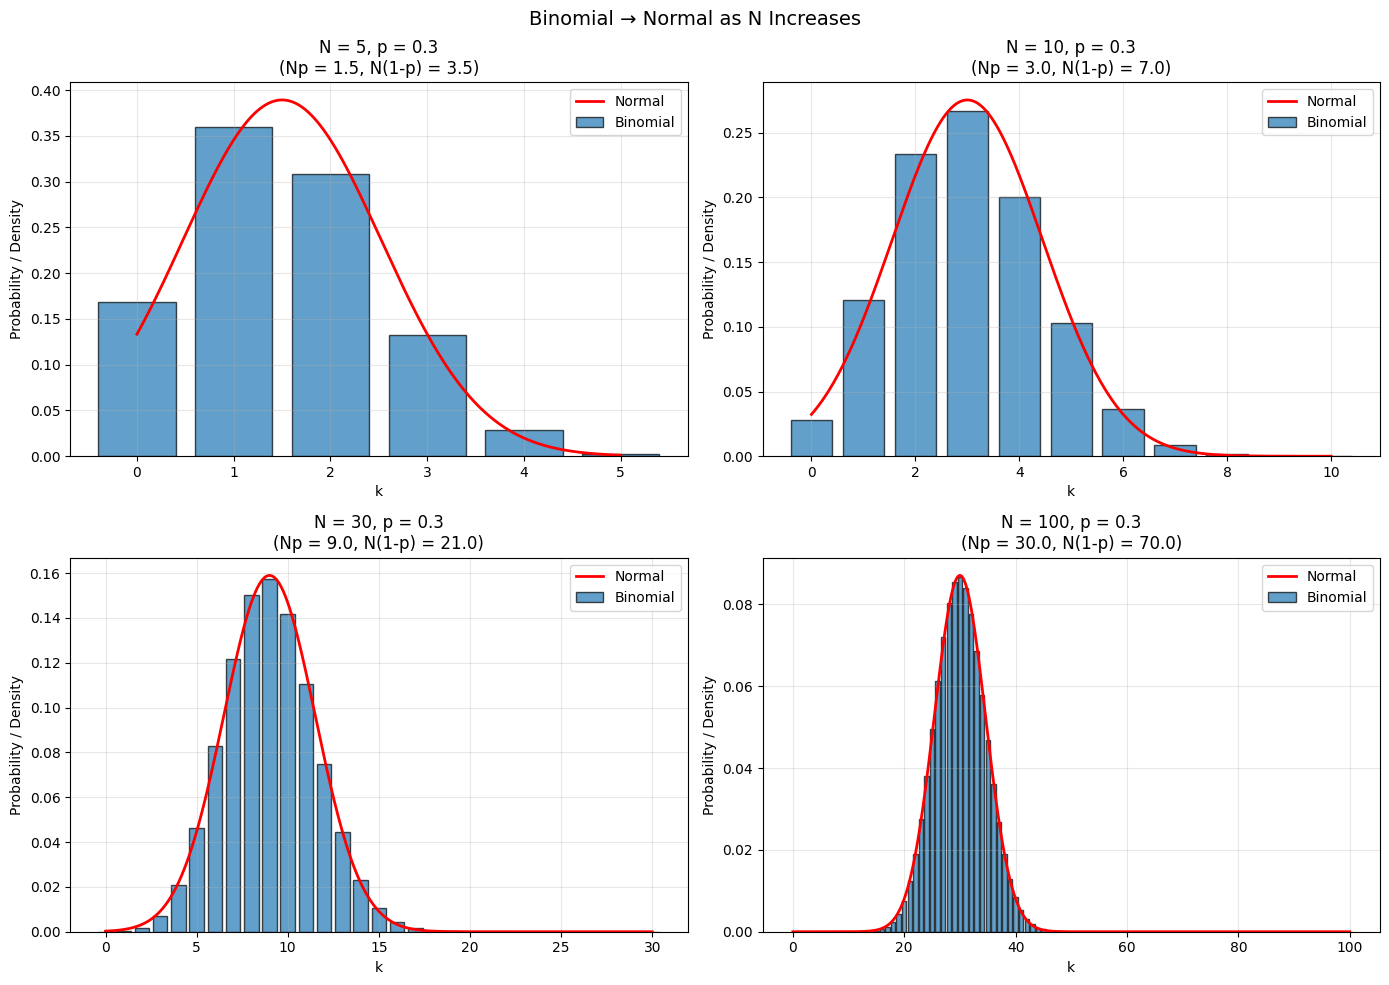

In [6]:
# Visualize convergence to normal
from scipy.stats import binom

p = 0.3
N_values = [5, 10, 30, 100]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, N in enumerate(N_values):
    k = np.arange(0, N+1)
    binom_pmf = binom.pmf(k, N, p)
    
    mu = N * p
    sigma = np.sqrt(N * p * (1-p))
    x = np.linspace(0, N, 1000)
    norm_pdf = stats.norm.pdf(x, mu, sigma)
    
    axes[idx].bar(k, binom_pmf, alpha=0.7, edgecolor='black', label='Binomial')
    axes[idx].plot(x, norm_pdf, 'r-', linewidth=2, label='Normal')
    axes[idx].set_xlabel('k')
    axes[idx].set_ylabel('Probability / Density')
    axes[idx].set_title(f'N = {N}, p = {p}\n(Np = {N*p:.1f}, N(1-p) = {N*(1-p):.1f})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Binomial → Normal as N Increases', fontsize=14)
plt.tight_layout()
plt.show()

---

## Summary

```{admonition} Normal Approximation to Binomial
:class: important

**When**: $X \sim \text{Binomial}(N, p)$ with $Np \geq 5$ AND $N(1-p) \geq 5$

**Approximation**: 
$$X \approx N(Np, Np(1-p))$$

**Continuity Correction**:
- $P(X = k) \approx P(k - 0.5 < Y < k + 0.5)$
- $P(X \leq k) \approx P(Y \leq k + 0.5)$
- $P(X \geq k) \approx P(Y \geq k - 0.5)$

where $Y \sim N(Np, Np(1-p))$

**Why**: Central Limit Theorem!
```

---

## Practice Problems

1. A coin is flipped 400 times. Use normal approximation to find:
   - $P(190 \leq X \leq 210)$
   - $P(X \geq 220)$
   - The value $k$ such that $P(X \geq k) = 0.05$

2. A multiple choice test has 100 questions, each with 4 choices. If you guess randomly:
   - What's the probability of getting exactly 25 correct?
   - What's the probability of passing (60% or more)?

3. A website has 1% conversion rate. With 10,000 visitors:
   - What's the probability of at least 120 conversions?
   - Between 80 and 110 conversions?

4. For $\text{Binomial}(20, 0.1)$, compare exact and approximate probabilities for $P(X = 3)$. Is the approximation good?

5. Derive the continuity correction formula starting from the histogram interpretation of discrete distributions.

---

## Chapter 5 Conclusion

You now know:
- **Discrete distributions**: Uniform, Bernoulli, Geometric, Binomial, Multinomial, Poisson
- **Continuous distributions**: Uniform, Beta, Gamma, Exponential
- **The Normal distribution**: Most important distribution in statistics
- **Normal approximation**: How to use CLT for practical calculations

These distributions form the toolkit for modeling real-world phenomena and form the foundation for statistical inference!

---

→ Return to [Chapter 5 Overview](chapter05.md)

→ Continue to Part III: Inference